The task is to predict the day price direction of Amazon.com, Inc. (AMZN).

The stock market is very complex and highly volatile.  
In order to be profitable, we do not need to predict the correct price, but rather, the price direction:  
If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.  
Therefore, task is binary classification on increasing price next day or decreasing 

#### EDA

In our initial exploration, we will load the data sets and see what data attributes are available to us.  
We will also plot variables, to see if we can find trends in data, and explore engineering additional features.  
We will do the data loading and analysis in pandas, so let us load that library and begin exploring.

In [46]:
import pandas as pd
# load the training set
df_train = pd.read_csv("./data/AMZN_train.csv")
# (#rows, #columns)
df_train.shape

(4781, 7)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


Pandas' info() method is really useful to get a quick peek at the column names, types, non-null counts, as well as the data set's memory size! We have mostly numerical columns (5 floats, 1 int) and an object column - the date. No null values at all, and just 261 KB in size.

In [7]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [48]:
# print the time range
df_train["Date"].min(), df_train["Date"].max()

('1997-05-15', '2016-05-13')

In [ ]:
We can plot the stock prices as a function of time. These plots are the first thing you see on any stock market.

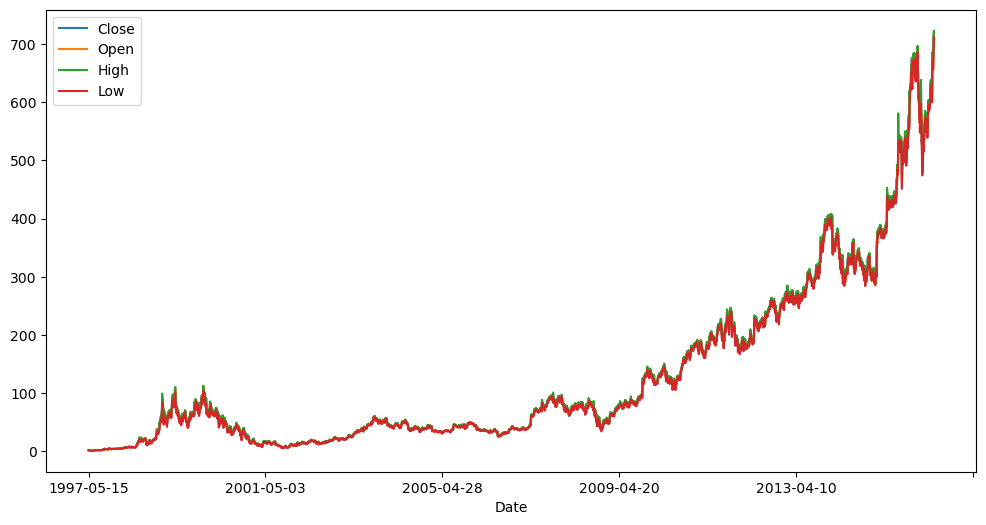

In [49]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
_ = df_train.plot(x="Date", y=["Close", "Open", "High", "Low"])

We would like to repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprising errors there. We create a function to do that.

In [50]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

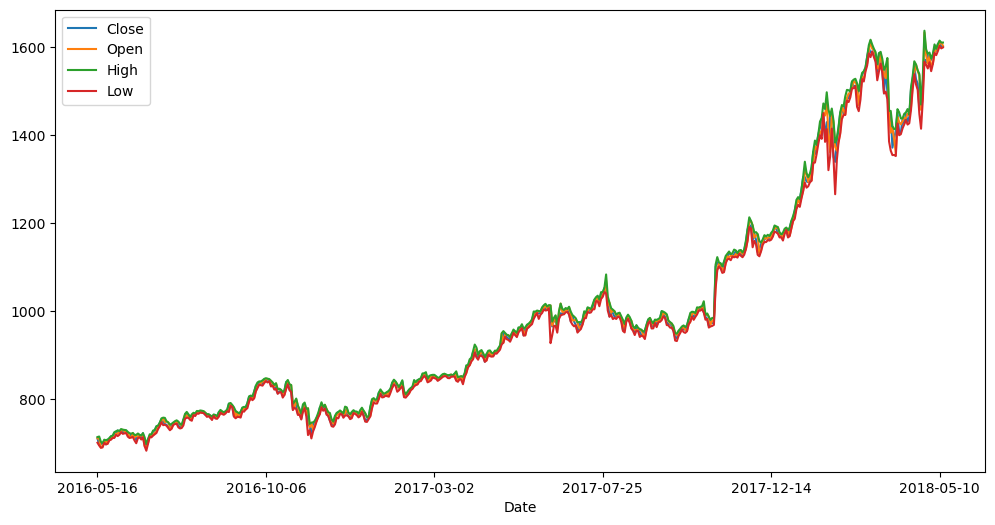

In [51]:
# read validation and test sets and then analyse them
df_val = pd.read_csv("./data/AMZN_val.csv")
analyse(df_val)

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  13

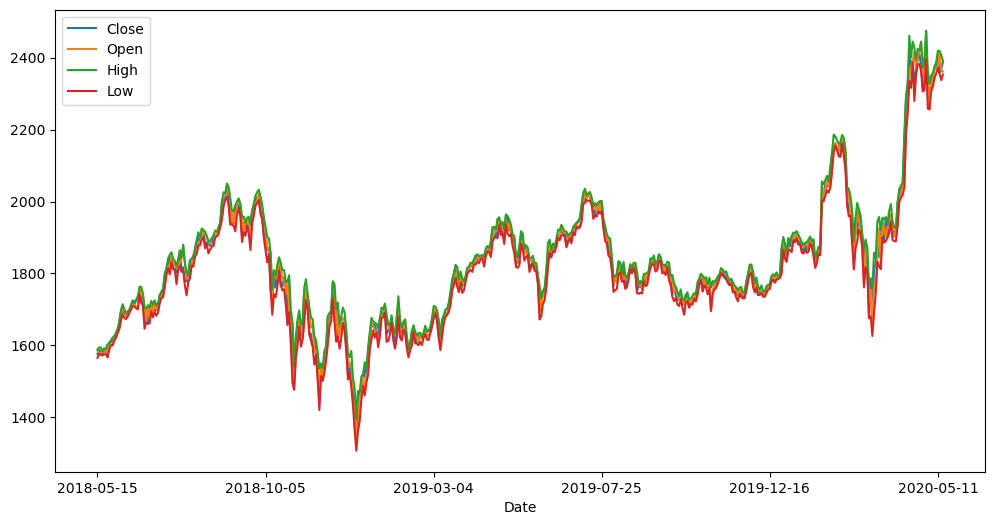

In [16]:
df_test = pd.read_csv("./data/AMZN_test.csv")
analyse(df_test)

In [52]:
# make sure that our data is sorted by date bc we're predicting direction
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [18]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [53]:
# notice that we shift by a period of '-1', 
# this is because direction is inherently a property of the next day's value, 
# so any particular day uses the next day's value to calculate its own direction value
# a positive period will take the days from the past
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [54]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


Running the value_counts method on the Target column gives us the distribution. We have 2292 days where the closing price is higher than the opening and 2389 where it is lower.

In [22]:
df_train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

In [55]:
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)

it might be useful to engineer some additional features that may help us better predict the price direction

### Feature Eng

stock prices are time-dependent, so we know that the next day's price depends on prices from previous days.  
somehow take into account all the values in the last n days, capturing the trend, or the magnitude of price change.  
A simple solution would be to calculate a moving average.

In [57]:
# use the rolling() to calculate moving averages provides us with an interface for sliding window calculations.
df_train["Moving_Average_3"] = (df_train["Close"] - df_train["Open"]).rolling(window=3, min_periods=1).mean()
df_val["Moving_Average_3"] = (df_val["Close"] - df_val["Open"]).rolling(window=3, min_periods=1).mean()
df_test["Moving_Average_3"] = (df_test["Close"] - df_test["Open"]).rolling(window=3, min_periods=1).mean()

df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()

Let's try a variety of things

In [58]:
# current price direction (open-close delta)
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

# price range (peak-trough delta)
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

In [59]:
# Final dataset
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,-0.479167,-0.479167,-0.479167,0.572917
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,-0.359375,-0.359375,-0.239583,0.270834
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,-0.256945,-0.256945,-0.052084,0.145833
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,-0.128472,-0.216146,-0.093750,0.114583
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,-0.118056,-0.214584,-0.208334,0.270833
...,...,...,...,...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1,3.160014,3.610011,5.799988,15.570007
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1,10.923340,5.821437,9.070007,11.049988
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1,7.436666,4.037153,7.440002,17.349976
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0,5.686666,4.978576,0.549988,10.940002


### Classical Machine Learning Algorithms

Via sklearn, let's implements Logistic regression, Decision tree, Random forest, Gradient boosting ensemble

In [60]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]

In [61]:
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_val[X_cols]
y_test = df_val[y_col]

#### Logistic Regression

In [62]:
# for reproducibility
RANDOM_SEED = 42

/Users/bryancoronelnew/opt/anaconda3/envs/stratascratch/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


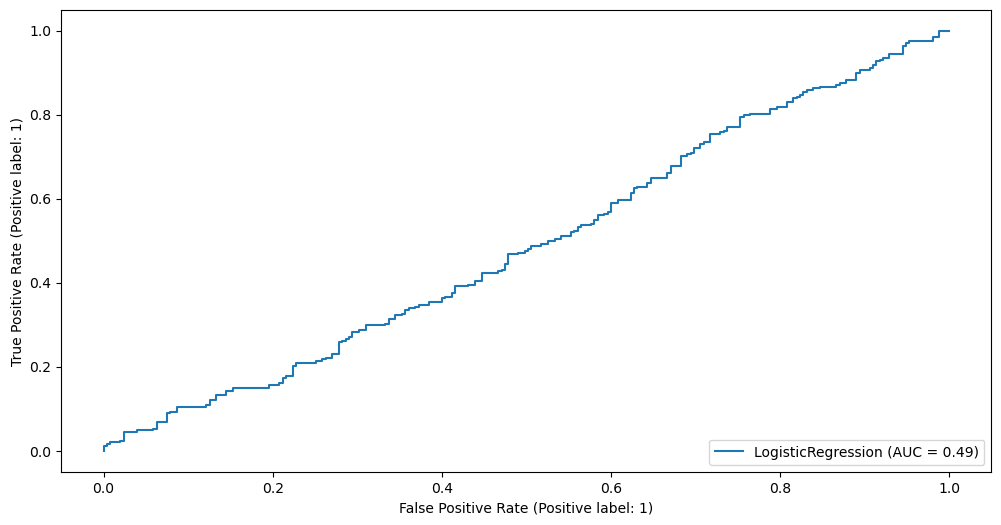

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, X_val, y_val)

Logistic regression does not work well for this problem. Having AUC < 0.5 means that the classifier is worse than just randomly guessing the output. Given that we are dealing with a very difficult problem, any AUC > 0.5 would suffice for this task.

#### Decision Tree

Decision trees deal better with non-linear spaces, so they might be able to produce a better model than logistic regression.

/Users/bryancoronelnew/opt/anaconda3/envs/stratascratch/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


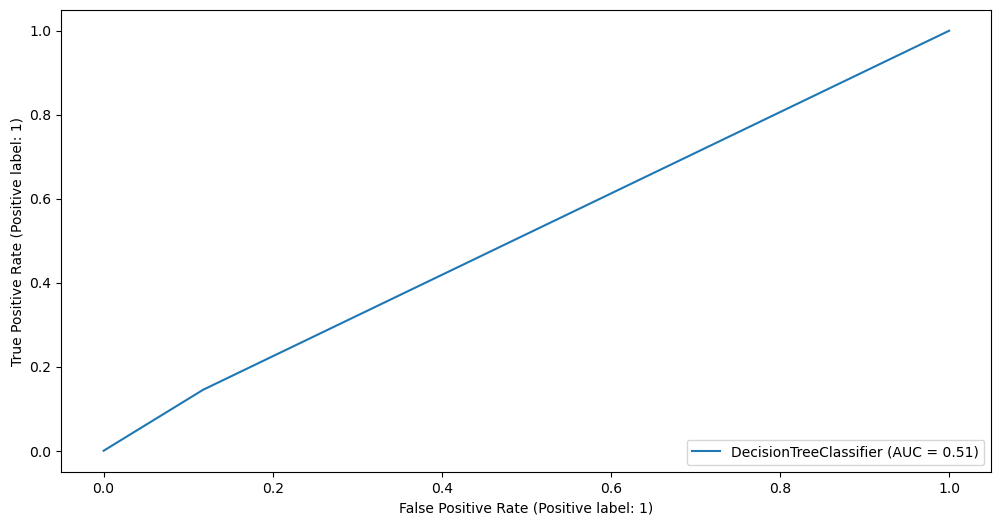

In [64]:
from sklearn.tree import DecisionTreeClassifier

# remember to use the random seed to be able to reproduce the same results
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

plot_roc_curve(dt, X_val, y_val)

Marginal improvement, decision tree outperforms the logistic regression model by 0.02, and its AUC is above 0.5!

#### Random Forest

Now we will try to use many decision trees, i.e., a forest.  
Random forest is an ensemble model that builds multiple decision trees  
It is generally expected that an ensemble model would outperform a base learner (i.e., the combination of predictions from many decision trees would be better / more stable than the prediction of just one decision tree).

/Users/bryancoronelnew/opt/anaconda3/envs/stratascratch/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


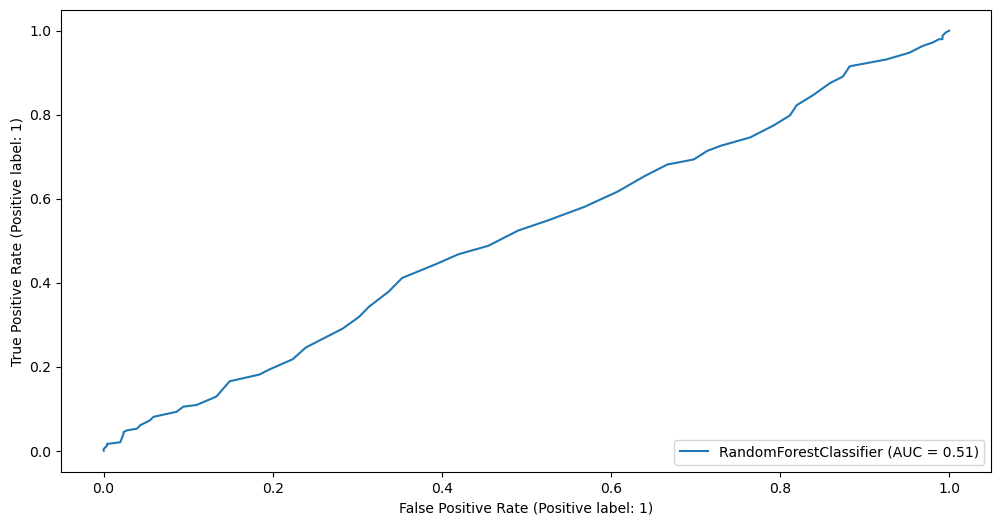

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

plot_roc_curve(rf, X_val, y_val)

Contrary to our expectations, the model does not outperform the decision tree, it actually performs the same.

#### Gradient Boosting Ensemble

A gradient boosting classifier is structurally the same as any ensemble learner - it is a collection of base learners  
The algorithm induces (learns) the trees one by one, and in each iteration, it gives greater weight to those instances that were wrongly misclassified  
the next tree would "pay more attention" while training on them. Sometimes this can improve performance.

/Users/bryancoronelnew/opt/anaconda3/envs/stratascratch/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


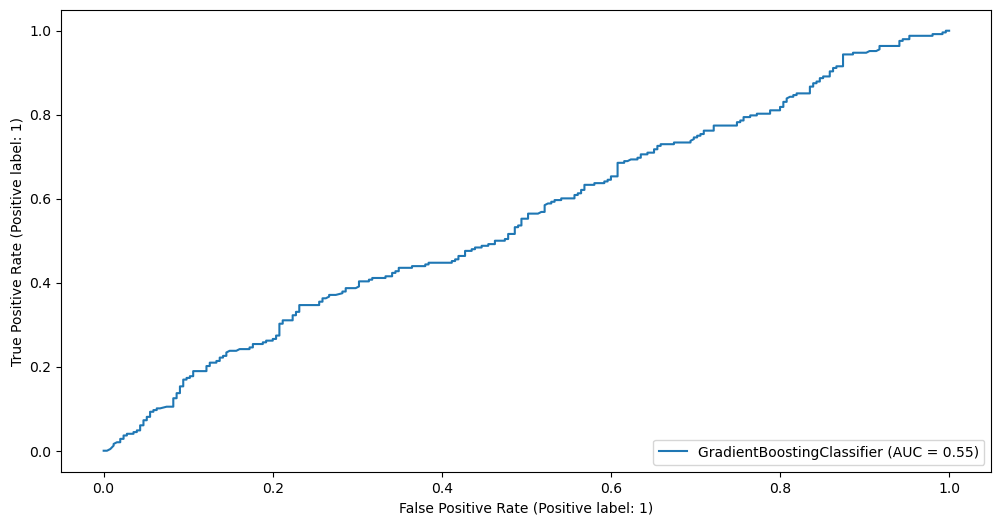

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

plot_roc_curve(gb, X_val, y_val)

We find out that gradient boosting works best for this data set.  
Let's train a deep learning model with the aim to outperform the baseline set here, i.e., AUC = 0.55

#### Deep Learning Algorithm

In [70]:
import tensorflow as tf

# set seed for reproducibility of results
tf.random.set_seed(RANDOM_SEED)

print("Tensorflow version", tf.__version__)

2023-01-03 01:21:43.721008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow version 2.10.0


Sequential neural network architecture:
1. Normalization layer that scales the data to a common range
2. A dense layer with 10 neurons and a ReLU activation function.
3. A dropout layer with a 0.2 probability of dropping a neuron.
4. Another dense layer with 5 neurons and ReLU activation function.
5. An output layer of just one neuron with a sigmoid activation function (the same one mentioned in the logistic regression part above)

Given that our data is relatively small, both in terms of training instances as well as in the number of columns, it is recommended that the model is small, otherwise, it will overfit very quickly.

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [85]:
# this configures the model's loss function, weight optimizer, and metrics to keep track of
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

Gonna train our model for 50 epochs, and keep track of its loss (binary_crossentropy) and AUC values during each epoch.  

To prevent overfitting, we are implementing two callbacks (functions to be called after each epoch):

1. Learning rate scheduler that decays the learning rate as the number of epochs increases.
2. Early stopping callback that stops training if the loss does not improve after a certain number of epochs.

In [86]:
# cool that a TF method takes in a function as an argument
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [87]:
# the model.fit(...) method returns a 'history' object with stats about the training
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50
150/150 [==============================] - 1s 2ms/step - loss: 349.1248 - auc: 0.5054 - val_loss: 32.5418 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 45.3784 - auc: 0.4928 - val_loss: 4.0954 - val_auc: 0.4941 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 14.8385 - auc: 0.5065 - val_loss: 6.6889 - val_auc: 0.5059 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 11.6040 - auc: 0.5072 - val_loss: 3.0024 - val_auc: 0.4921 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 9.0202 - auc: 0.4914 - val_loss: 6.1263 - val_auc: 0.4998 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 7.1505 - auc: 0.4958 - val_loss: 1.5759 - val_auc: 0.4902 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 2.8756 - auc: 0.4999 - val_loss: 1.8953 - val_

We let model train for 50 epochs. Observe the change in the learning rate, which is due to the learning rate scheduler callback that we implemented.  
The early stopping callback fired, at the 11th epoch, which means that the validation loss has not been improving over time.  
However, we observe that both training and validation AUC are very close to 0.5, improving the overall score only over the logistic regression model.

With the call of the model.summary() method we can get an overview of the structure of the model.

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 192
Trainable params: 171
Non-trainable params: 21
_______________________________________________________

Below, we plot the train and validation loss and AUC values as a function of the epoch.  
We use the matplotlib library, and the history object to do that

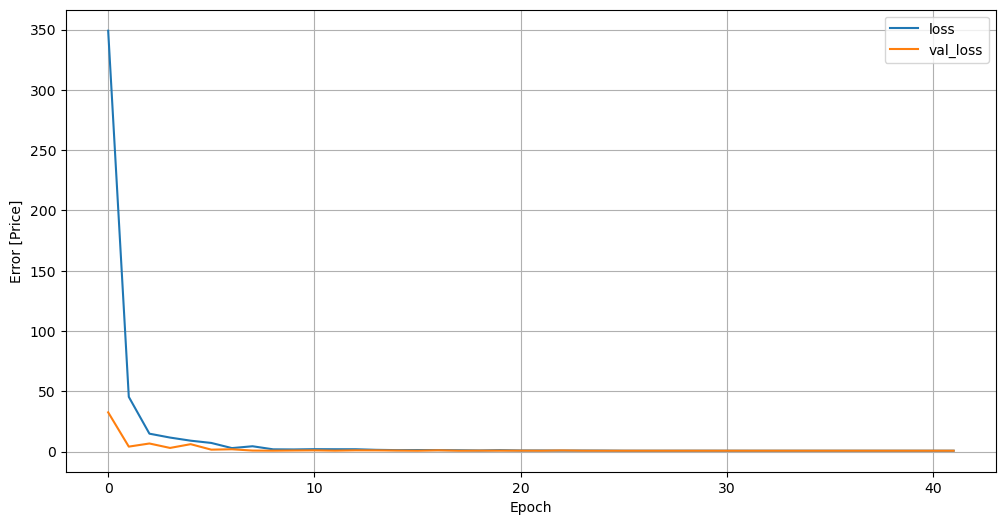

In [89]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

training loss starts high, falls steeply after the first epoch, and then remains pretty much equal, with very little improvement over time.  
validation loss does not change, implying that the model is overfitting the training data.  
many possible reasons for this: too complex model, small data set, features that are not predictive, etc.  
Not good conclusion can be drawn from change in AUC over time

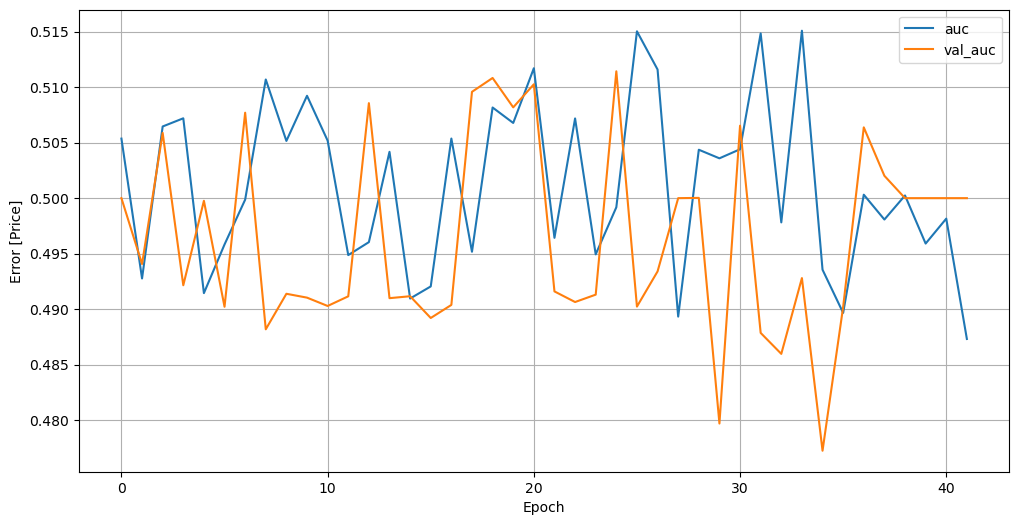

In [90]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

#### Conclusion

The gradient boosting classifier provided the best AUC score on the validation set.  
It is a common machine learning practice to train multiple models on the same train/validation data set and provide a model that works best.  
To simulate a production environment, we have held the test set aside until now.

In the next cell, we are going to evaluate the performance of the gradient boosting classifier on the test set. This is simple as calling plot_roc_curve with the test set instead of the validation one.

in the last cell, we are showing a feature importance plot (the higher the value the more important the feature is for determining the value of the target variable).

/Users/bryancoronelnew/opt/anaconda3/envs/stratascratch/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


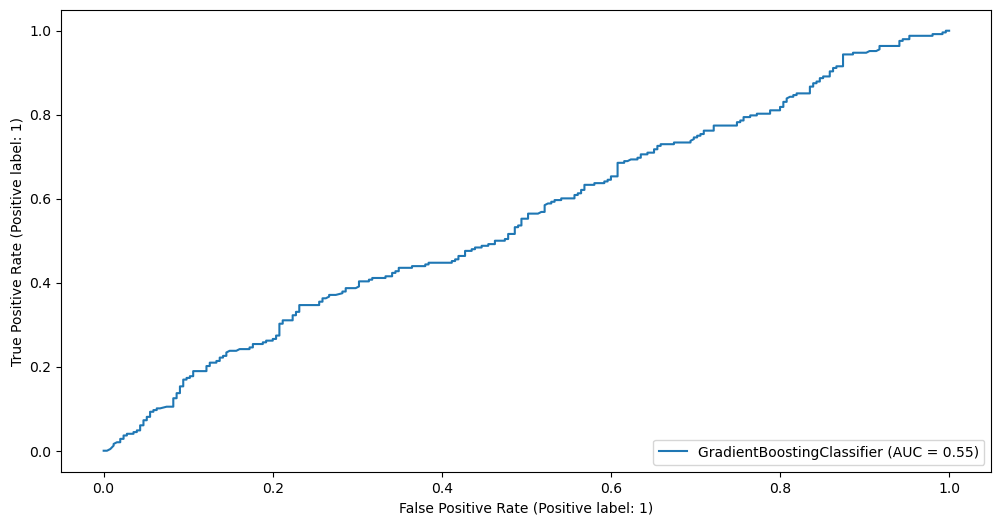

In [91]:
plot_roc_curve(gb, X_test, y_test)

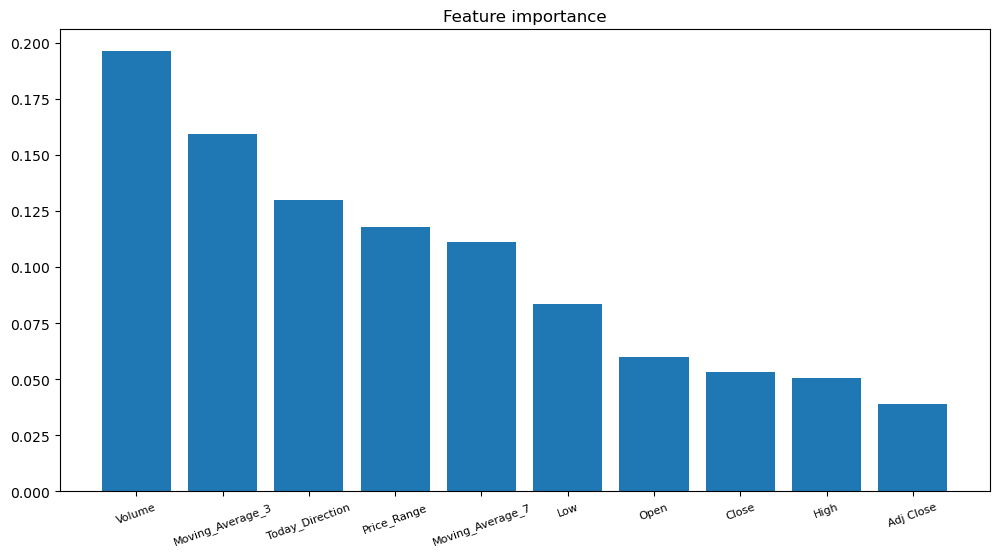

In [94]:
import numpy as np
# Calculate feature importances
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(12, 6))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)